# Data Preprocessing

In [8]:
# Improt libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# Load the provided Excel file
file_path = 'Coffee Shop Sales.xlsx'
coffee_sales_data = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
coffee_sales_data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [3]:
# Check for missing values
missing_values = coffee_sales_data.isnull().sum()
missing_values

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [14]:
# Add a new column for Total Sales (transaction_qty * unit_price)
coffee_sales_data['Total Sales'] = coffee_sales_data['transaction_qty'] * coffee_sales_data['unit_price']
# Month as text
coffee_sales_data['Month'] = coffee_sales_data['transaction_date'].dt.strftime('%b')

# Day of Week as text
coffee_sales_data['Day of Week'] = coffee_sales_data['transaction_date'].dt.strftime('%a')

# First, ensure that transaction_time is in the correct datetime format
coffee_sales_data['transaction_time'] = pd.to_datetime(coffee_sales_data['transaction_time'], format='%H:%M:%S').dt.time

# Extract Hour from the transaction time and add it as a new column
coffee_sales_data['Hour'] = pd.to_datetime(coffee_sales_data['transaction_time'], format='%H:%M:%S').dt.hour

coffee_sales_data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Total Sales,Month,Day of Week,Hour
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,Jan,Sun,7
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,Jan,Sun,7
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,Jan,Sun,7
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,Jan,Sun,7
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,Jan,Sun,7


In [15]:
# Check for any duplicates
duplicates = coffee_sales_data.duplicated().sum()
print("Total Duplicate: ", duplicates)

Total Duplicate:  0


In [16]:
# Save the processed data to a new Excel file
processed_file_path = 'Updated_Coffee_Shop_Sales.xlsx'
coffee_sales_data.to_excel(processed_file_path, index=False)

# Exploratory Data Analysis

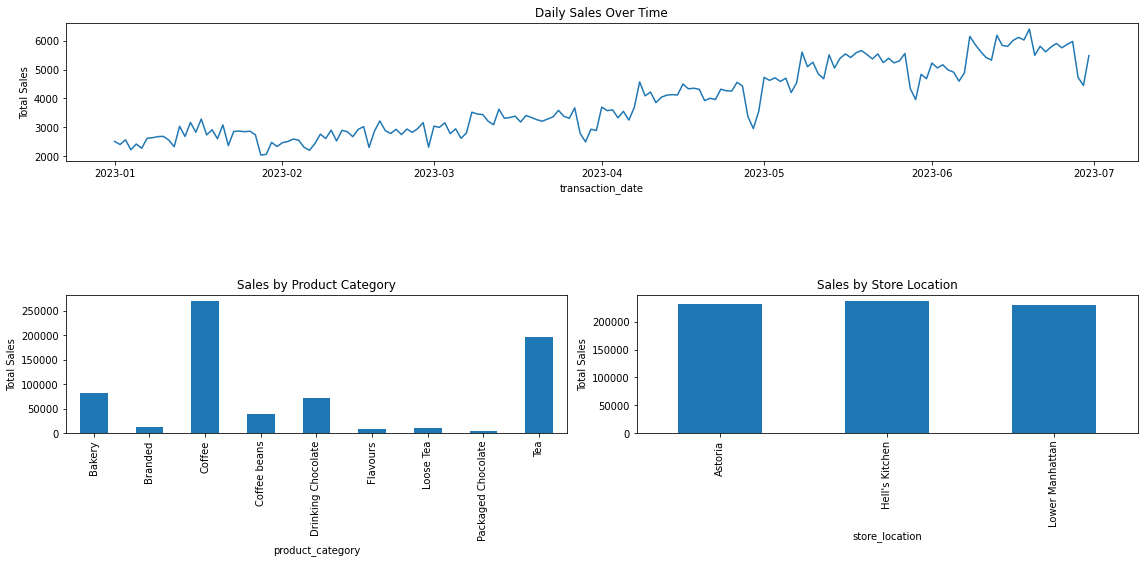

In [17]:
# Load the processed data
coffee_sales_processed = pd.read_excel(processed_file_path)

# Convert transaction_date to datetime for proper analysis
coffee_sales_processed['transaction_date'] = pd.to_datetime(coffee_sales_processed['transaction_date'])

# EDA 1: Sales Overview - Total sales over time (daily, weekly, monthly)
# Grouping the data by different time periods
daily_sales = coffee_sales_processed.groupby(coffee_sales_processed['transaction_date'].dt.date)['Total Sales'].sum()
weekly_sales = coffee_sales_processed.groupby(pd.Grouper(key='transaction_date', freq='W-MON'))['Total Sales'].sum()
monthly_sales = coffee_sales_processed.groupby(pd.Grouper(key='transaction_date', freq='M'))['Total Sales'].sum()

# EDA 2: Product Performance - Sales by product category and type
product_category_sales = coffee_sales_processed.groupby('product_category')['Total Sales'].sum()
product_type_sales = coffee_sales_processed.groupby('product_type')['Total Sales'].sum()

# EDA 3: Store Performance - Sales comparison across different store locations
store_sales = coffee_sales_processed.groupby('store_location')['Total Sales'].sum()

# EDA 4: Transaction Details - A detailed view of transactions
# (quantity, unit price, total sales per transaction)
transaction_details = coffee_sales_processed[['transaction_qty', 'unit_price', 'Total Sales']]

# Plotting for visualization
plt.figure(figsize=(16, 10))

# Daily Sales
plt.subplot(3, 1, 1)
daily_sales.plot(kind='line', title='Daily Sales Over Time')
plt.ylabel('Total Sales')

# Product Category Sales
plt.subplot(3, 2, 3)
product_category_sales.plot(kind='bar', title='Sales by Product Category')
plt.ylabel('Total Sales')

# Store Sales
plt.subplot(3, 2, 4)
store_sales.plot(kind='bar', title='Sales by Store Location')
plt.ylabel('Total Sales')

# Show plots
plt.tight_layout()
plt.show()

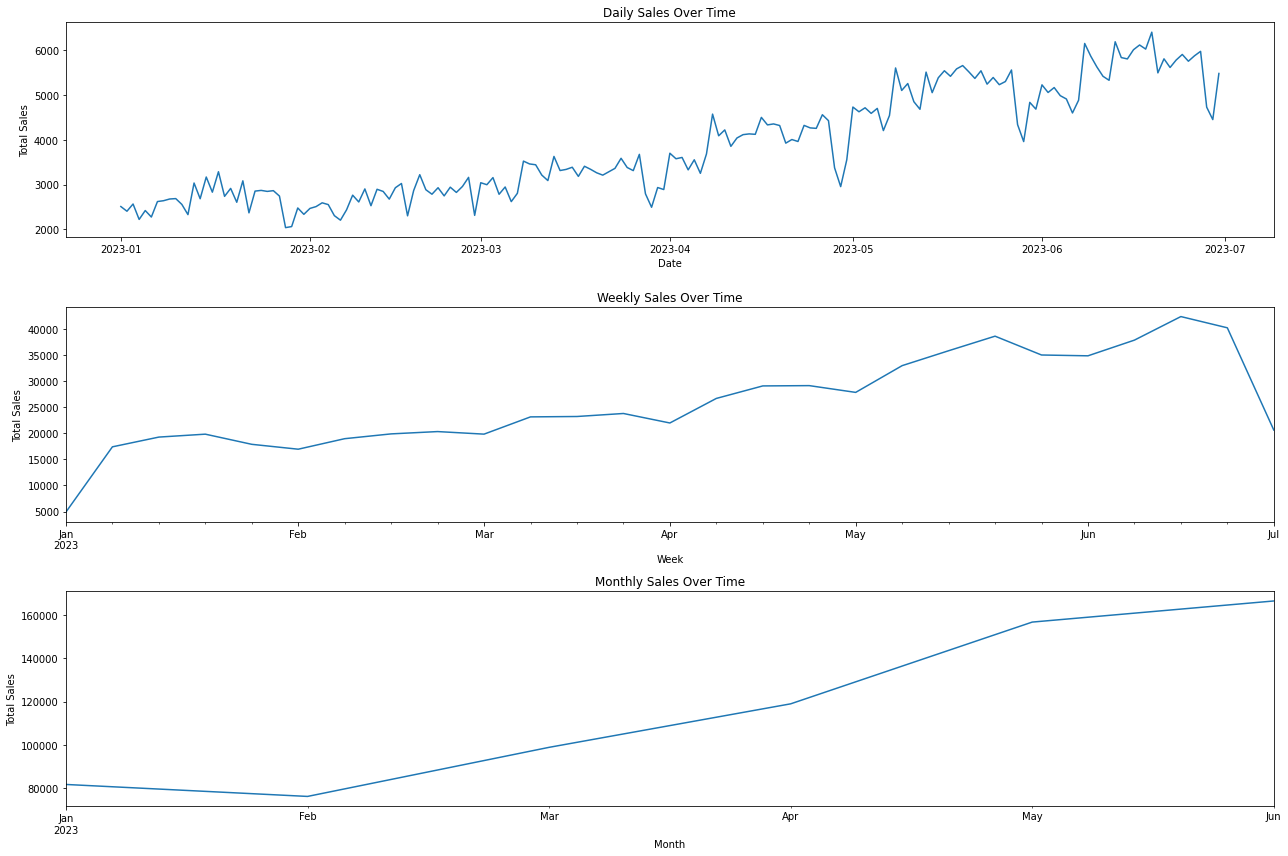

In [18]:
# Plotting Daily, Weekly, and Monthly Sales
plt.figure(figsize=(18, 12))

# Daily Sales
plt.subplot(3, 1, 1)
daily_sales.plot(kind='line', title='Daily Sales Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Date')

# Weekly Sales
plt.subplot(3, 1, 2)
weekly_sales.plot(kind='line', title='Weekly Sales Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Week')

# Monthly Sales
plt.subplot(3, 1, 3)
monthly_sales.plot(kind='line', title='Monthly Sales Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Month')

plt.tight_layout()
plt.show()

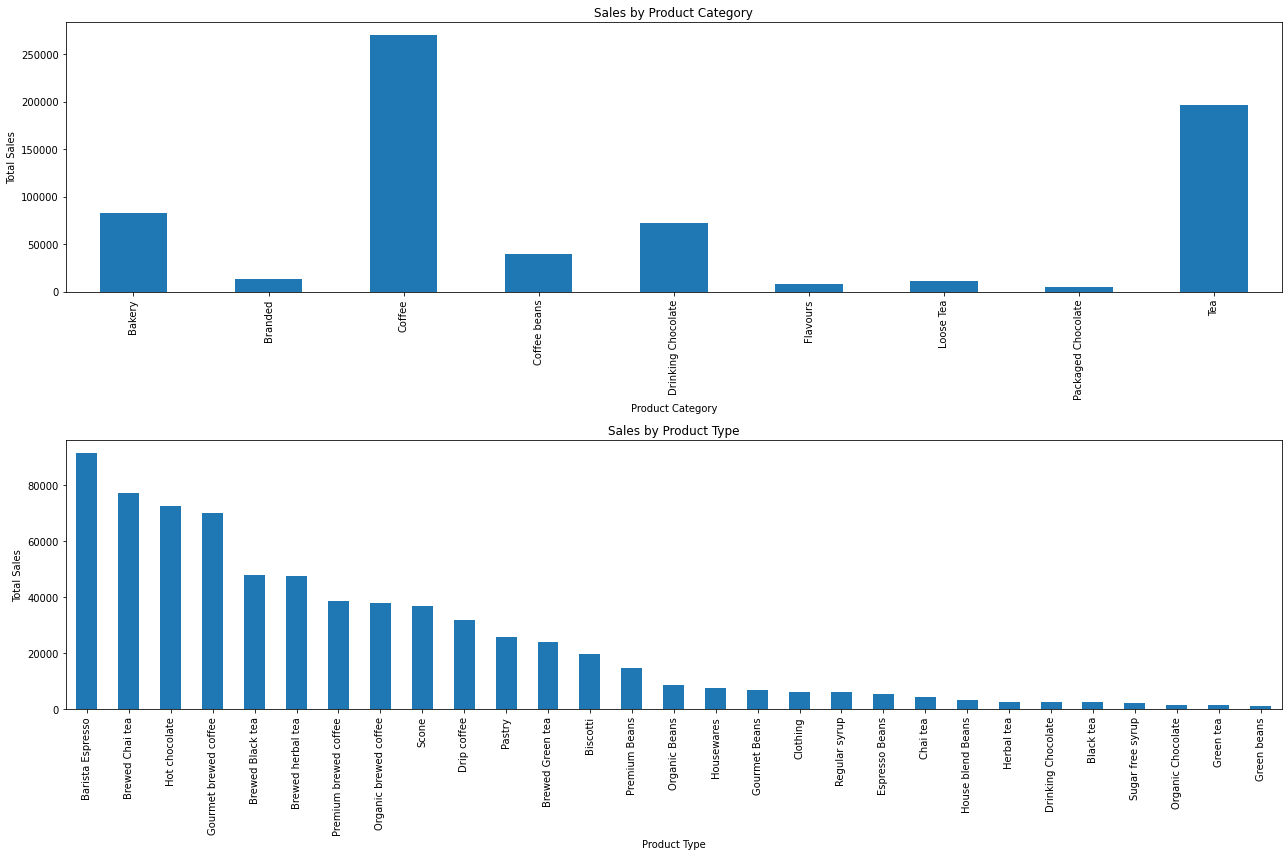

In [19]:
# EDA 2: Product Performance - Sales by product category and type

plt.figure(figsize=(18, 12))

# Sales by Product Category
plt.subplot(2, 1, 1)
product_category_sales.plot(kind='bar', title='Sales by Product Category')
plt.ylabel('Total Sales')
plt.xlabel('Product Category')

# Sales by Product Type
plt.subplot(2, 1, 2)
product_type_sales.sort_values(ascending=False).plot(kind='bar', title='Sales by Product Type')
plt.ylabel('Total Sales')
plt.xlabel('Product Type')

plt.tight_layout()
plt.show()

In [20]:
# Number of transactions recorded
num_transactions = coffee_sales_processed['transaction_id'].nunique()

# Period of time over which the data is recorded
period_start = coffee_sales_processed['transaction_date'].min()
period_end = coffee_sales_processed['transaction_date'].max()

# Different products and product categories sold
unique_products = coffee_sales_processed['product_detail'].nunique()
unique_product_categories = coffee_sales_processed['product_category'].nunique()

# Extracting lists of unique products and product categories
list_products = coffee_sales_processed['product_detail'].unique()
list_product_categories = coffee_sales_processed['product_category'].unique()

num_transactions, period_start, period_end, unique_products, unique_product_categories, list_products, list_product_categories

(149116,
 Timestamp('2023-01-01 00:00:00'),
 Timestamp('2023-06-30 00:00:00'),
 80,
 9,
 array(['Ethiopia Rg', 'Spicy Eye Opener Chai Lg', 'Dark chocolate Lg',
        'Our Old Time Diner Blend Sm', 'Oatmeal Scone',
        'Columbian Medium Roast Sm', 'Latte Rg', 'Dark chocolate Rg',
        'Spicy Eye Opener Chai Rg', 'Ethiopia Lg', 'Earl Grey Lg',
        'Ouro Brasileiro shot', 'Serenity Green Tea Lg',
        'Jumbo Savory Scone', 'Lemon Grass Rg',
        'Sustainably Grown Organic Lg', 'Hazelnut Biscotti', 'Cappuccino',
        'Lemon Grass Lg', 'Chocolate Chip Biscotti', 'Peppermint Lg',
        'Chocolate Croissant', 'Latte', 'Brazilian Rg', 'Brazilian Lg',
        'Columbian Medium Roast Rg', 'Morning Sunrise Chai Rg',
        'Morning Sunrise Chai Lg', 'Our Old Time Diner Blend Lg',
        'Sustainably Grown Organic Rg', 'Scottish Cream Scone ',
        'Peppermint Rg', 'English Breakfast Rg',
        'Our Old Time Diner Blend Rg', 'Serenity Green Tea Rg',
        'Brazilia

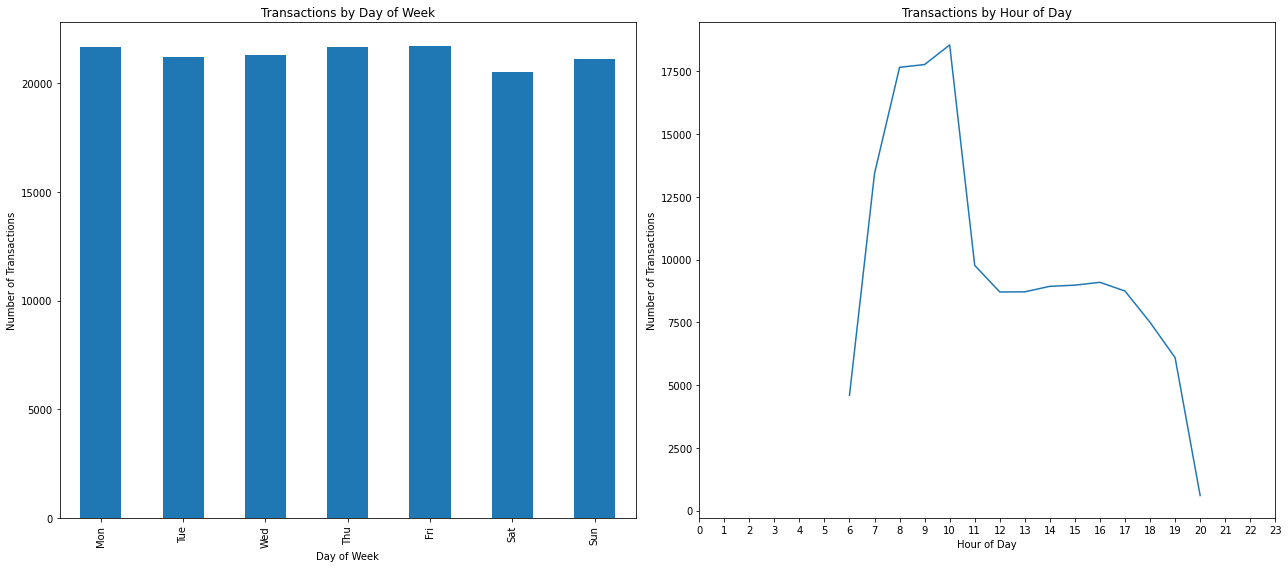

In [21]:
# Grouping data by Day of Week and counting transactions
transactions_by_day = coffee_sales_processed.groupby('Day of Week')['transaction_id'].count()

# Sorting the days of the week in the correct order
ordered_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
transactions_by_day = transactions_by_day.reindex(ordered_days)

# Grouping data by Hour of Day and counting transactions
transactions_by_hour = coffee_sales_processed.groupby('Hour')['transaction_id'].count()

# Plotting
plt.figure(figsize=(18, 8))

# Transactions by Day of Week
plt.subplot(1, 2, 1)
transactions_by_day.plot(kind='bar', title='Transactions by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Transactions')

# Transactions by Hour of Day
plt.subplot(1, 2, 2)
transactions_by_hour.plot(kind='line', title='Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24))  # Setting x-axis ticks for each hour

plt.tight_layout()
plt.show()

In [22]:
# Creating a dataframe for Transactions by Day of Week
df_transactions_by_day = transactions_by_day.reset_index()
df_transactions_by_day.columns = ['Day of Week', 'Number of Transactions']

# Creating a dataframe for Transactions by Hour of Day
df_transactions_by_hour = transactions_by_hour.reset_index()
df_transactions_by_hour.columns = ['Hour of Day', 'Number of Transactions']

df_transactions_by_day, df_transactions_by_hour

(  Day of Week  Number of Transactions
 0         Mon                   21643
 1         Tue                   21202
 2         Wed                   21310
 3         Thu                   21654
 4         Fri                   21701
 5         Sat                   20510
 6         Sun                   21096,
     Hour of Day  Number of Transactions
 0             6                    4594
 1             7                   13428
 2             8                   17654
 3             9                   17764
 4            10                   18545
 5            11                    9766
 6            12                    8708
 7            13                    8714
 8            14                    8933
 9            15                    8979
 10           16                    9093
 11           17                    8745
 12           18                    7498
 13           19                    6092
 14           20                     603)

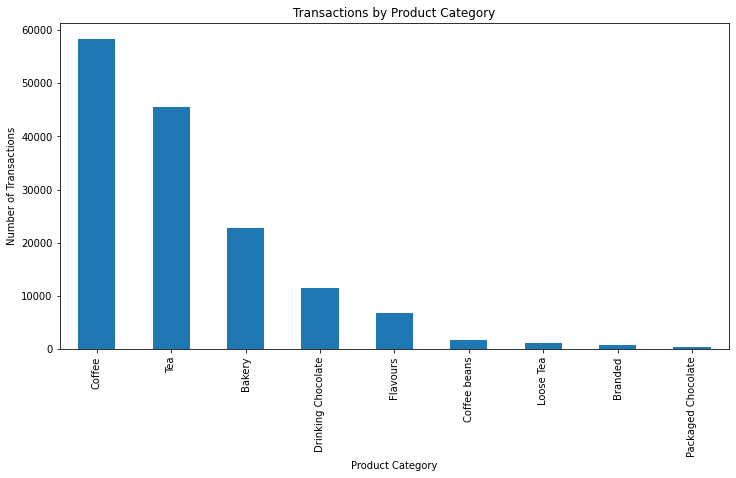

In [23]:
# Analyzing the number of transactions by Product Category

# Grouping data by Product Category and counting transactions
transactions_by_category = coffee_sales_processed.groupby('product_category')['transaction_id'].count().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
transactions_by_category.plot(kind='bar', title='Transactions by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Transactions')

plt.show()

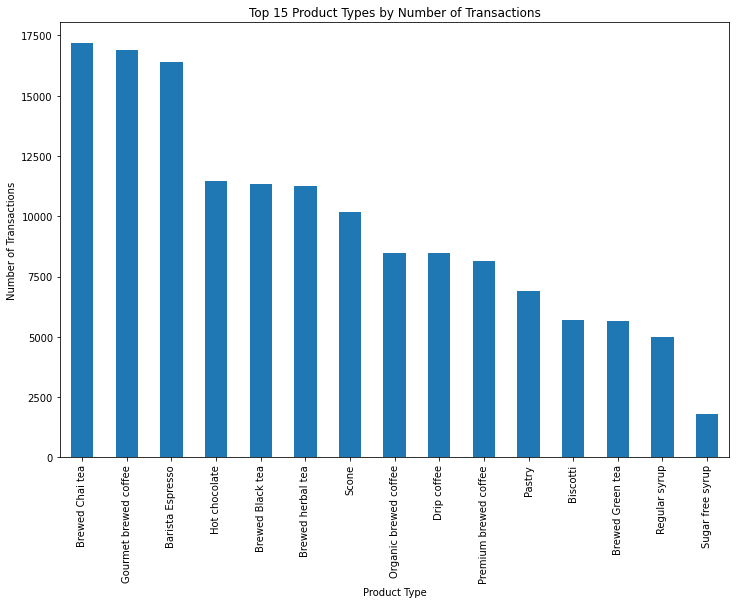

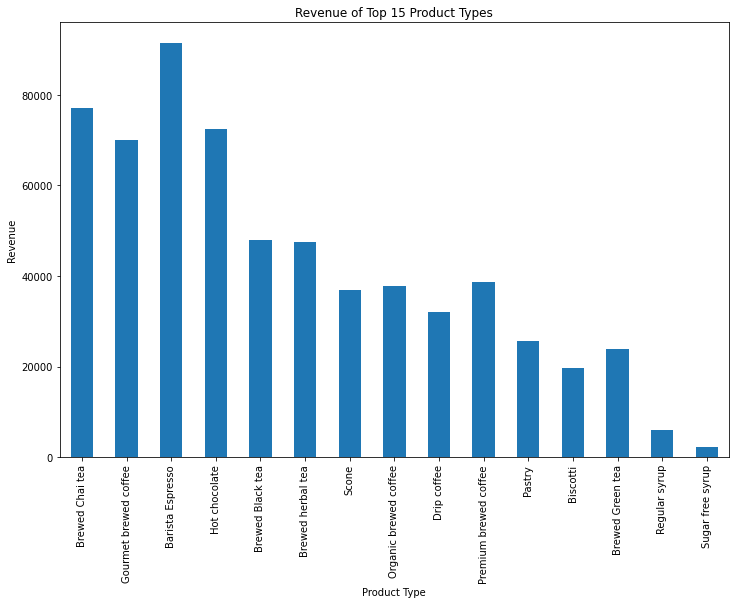

In [24]:
# Analyzing the number of transactions and revenue by Product Type

# Grouping data by Product Type
grouped_by_product_type = coffee_sales_processed.groupby('product_type').agg(
    Number_of_Transactions=('transaction_id', 'count'),
    Revenue=('Total Sales', 'sum')
).sort_values(by='Number_of_Transactions', ascending=False)

# Filtering to the Top 15 product types by number of transactions
top_15_product_types = grouped_by_product_type.head(15)

# Plotting
plt.figure(figsize=(12, 8))

# Transactions by Product Type
top_15_product_types['Number_of_Transactions'].plot(kind='bar', title='Top 15 Product Types by Number of Transactions')
plt.xlabel('Product Type')
plt.ylabel('Number of Transactions')

plt.show()

# Revenue by Product Type
plt.figure(figsize=(12, 8))
top_15_product_types['Revenue'].plot(kind='bar', title='Revenue of Top 15 Product Types')
plt.xlabel('Product Type')
plt.ylabel('Revenue')

plt.show()

